**Abstract**:

Este proyecto tiene como objetivo principal desarrollar un modelo capaz de predecir los precios de las viviendas en función de los valores de sus variables asociadas.

Antes de generar y entrenar el modelo, se realizará un análisis descriptivo de las variables más relevantes, con el objetivo de comprender mejor los datos y su comportamiento.










**Importar librerias**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score





**importar dataset**

In [16]:
#importar dataset y dejar como dataframe

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train casas.csv')


**Dimensiones del dataset**

In [3]:
# Consultar las dimensiones del DataFrame
print(df.shape)

(1460, 81)


**Mostrar primeros 5 registros**

In [4]:
#mostrar primeros registros del dataframe
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Buscar numero de NAs en las columnas

*es importante detectar los NA para saber si se van a imputar de alguna manera, o si se deben eliminar registros que los contengan

In [5]:
# Filtrar columnas con valores nulos
columns_with_na = df.isnull().sum()[df.isnull().sum() > 0]

# Mostrar las columnas con valores nulos y su conteo
print(columns_with_na)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


**HISTOGRAMA**

Se mostrará un histograma con el objetivo de entender, a grandes razgos, en como se distribuyen los precios de las casas

Text(0, 0.5, 'Frecuencia')

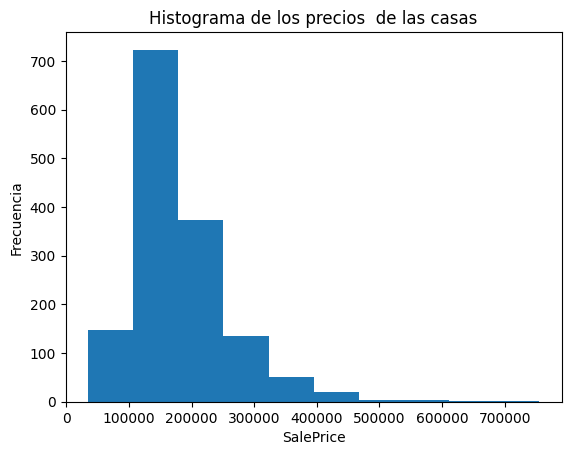

In [6]:
plt.hist(df['SalePrice'])
plt.title('Histograma de los precios  de las casas')
plt.xlabel('SalePrice')
plt.ylabel('Frecuencia')

El histograma nos da una idea visual de entre que valores se mueve la variable precio

**Estadisticos descriptivos**

In [7]:
print(df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


El promedio es una medida de tendencia central que nos indica hacia que numero tienden los valores, por lo tanto se puede afirmar que los precios de de las casas rondan los 180921.195890

GRAFICO DE CORRELACION

con este grafico se podrá ver cuales variables numericas están correlacionadas, y esto nos permitirá ver cuales variables podrian generar, probablemente, multicolinealidad si se utiliza un modelo de regresión


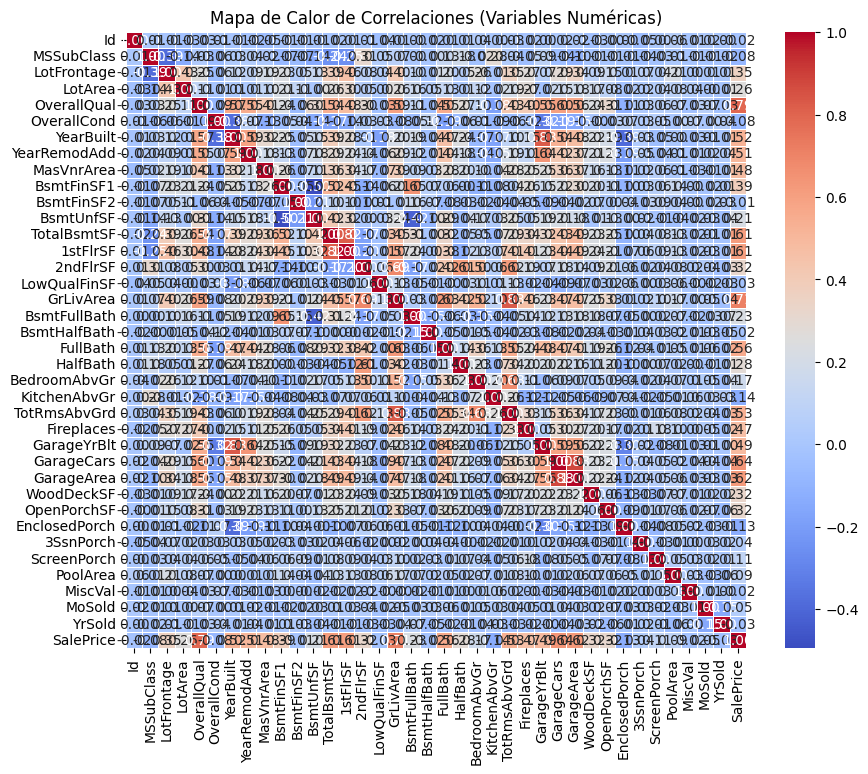

In [8]:
# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear el heatmap usando funcion de seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Título del gráfico
plt.title("Mapa de Calor de Correlaciones (Variables Numéricas)")

# Mostrar el gráfico
plt.show()

Em este caso al contar con tantas variables el grafico no permite apreciar bien las correlaciones, asi que queda pendiente buscar otra alternativa visual que muestre de mejor manera las correlaciones

CORRELACION ENTRE COVARIABLE Y VARIABLE RESPUESTA

a continuacion se hara una matriz que indique como se correlacion la variable respuesta (SalePrice) con las diferentes variables

In [9]:
# Seleccionar las correlaciones con 'SalePrice'
saleprice_correlation = correlation_matrix["SalePrice"].sort_values(ascending=False)

# Mostrar las correlaciones
print(saleprice_correlation)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

hacer grafico de dispersion entre las variable precio y las 5 variables con mayor correlacion

Text(0, 0.5, 'Overall Quality (OverallQual)')

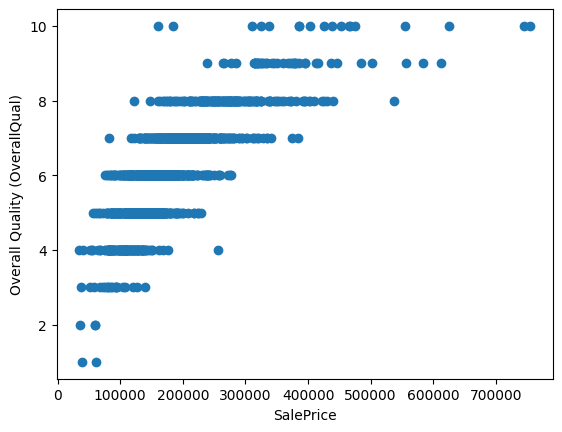

In [10]:
#crear gráfico de dispersión
plt.scatter(numeric_df['SalePrice'],numeric_df['OverallQual'])
# Agregar etiquetas a los ejes
plt.xlabel('SalePrice')
plt.ylabel('Overall Quality (OverallQual)')


Text(0, 0.5, 'GrLivArea')

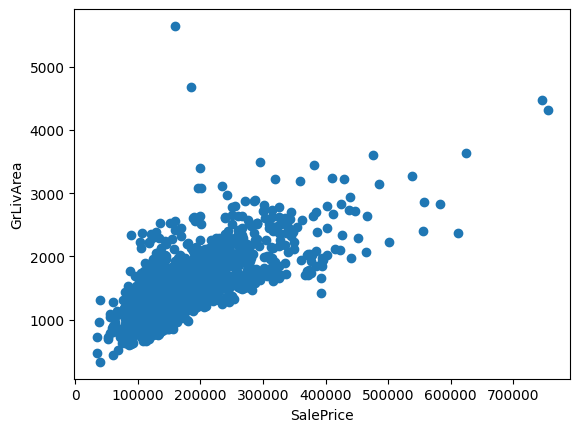

In [11]:
#crear gráfico de dispersión
plt.scatter(numeric_df['SalePrice'],numeric_df['GrLivArea'])
# Agregar etiquetas a los ejes
plt.xlabel('SalePrice')
plt.ylabel('GrLivArea')


Text(0, 0.5, 'GarageCars')

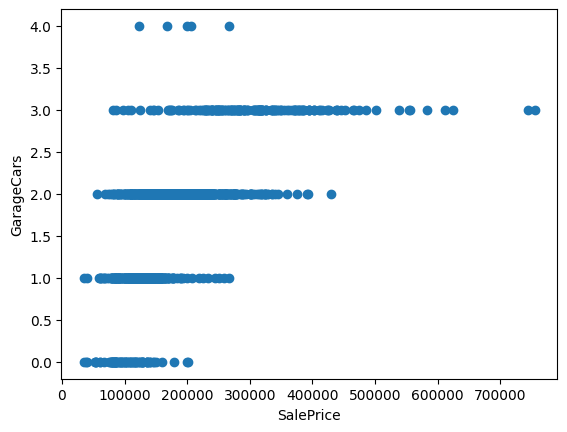

In [12]:
#crear gráfico de dispersión
plt.scatter(numeric_df['SalePrice'],numeric_df['GarageCars'])
# Agregar etiquetas a los ejes
plt.xlabel('SalePrice')
plt.ylabel('GarageCars')

REDUCION DE DIMENSIONALIDAD USANDO PCA

*El Análisis de Componentes Principales (PCA) sirve para reducir la dimensionalidad de los datos al transformar variables correlacionadas en un conjunto de nuevas variables no correlacionadas (componentes principales), preservando la mayor varianza posible y facilitando el análisis.

In [23]:
# Seleccionar solo variables numéricas y eliminar la variable objetivo 'SalePrice' (no confundir con numeric_df)

# Seleccionar solo variables numéricas y eliminar la variable objetivo 'SalePrice'
df_numeric = df.select_dtypes(include=[np.number]).drop(columns=['SalePrice'])

# Manejo de valores faltantes (reemplazar por la media)
df_numeric.fillna(df_numeric.mean(), inplace=True)

# Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Aplicar PCA
num_components = 10  # Puedes ajustar el número de componentes
pca = PCA(n_components=num_components)
df_pca = pca.fit_transform(df_scaled)

# Convertir PCA a DataFrame y renombrar columnas
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(num_components)])

# Agregar la variable objetivo 'SalePrice' de vuelta al dataset PCA
df_final = pd.concat([df_pca, df[['SalePrice']]], axis=1)



ENTRENARMIENTO Y TESTEO DEL MODELO DE REGRESIÓN LINEAL

In [24]:

# Dividir en conjunto de entrenamiento (80%) y testeo (20%)
train_data, test_data = train_test_split(df_final, test_size=0.2, random_state=123)

# Separar features (X) y variable objetivo (y)
X_train, y_train = train_data.drop(columns=['SalePrice']), train_data['SalePrice']
X_test, y_test = test_data.drop(columns=['SalePrice']), test_data['SalePrice']

# Ajustar el modelo de regresión lineal
modelo_lm = LinearRegression()
modelo_lm.fit(X_train, y_train)

# Predecir en test set
predicciones = modelo_lm.predict(X_test)

METRICAS DE DESEMPEÑO DEL MODELO DE REGRESIÓN LINEAL

In [25]:

# Calcular métricas de desempeño
rmse = np.sqrt(mean_squared_error(y_test, predicciones))
mae = mean_absolute_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)

# Mostrar métricas de desempeño de la regresión
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")




RMSE: 33833.39
R²: 0.8148


Interpretación de las metricas de desempeño:



*   El error cuadrático medio indica cuánto, en promedio, se desvía la predicción del modelo respecto al valor real en términos absolutos. Un RMSE de 33,833.39 significa que, en promedio, el modelo se equivoca en aproximadamente $33,833 al predecir el precio de las casas. Es dificil decir si es un buen resultado, pero al menos podemos comparandolo con el precio promedio de 180.921 y tener una idea si se equivoca mucho o poco, pero de manera subjetiva


*   El R² mide qué tan bien el modelo explica la variabilidad de los datos. Su valor va de 0 a 1. Con un R² de 0.8148 se puede afirmar  que el modelo explica el 81.48% de la variabilidad en los precios de las casas.




